In [3]:
import pandas as pd
import numpy as np
import string
from pymongo import MongoClient
import matplotlib.pyplot as plt
%matplotlib inline
from textblob import TextBlob
import re

In [9]:
connection = MongoClient()
db = connection.wta

def mongo2PandasClean(mongodb, drop_id=True):
    df = pd.DataFrame(list(mongodb.find()))
    if drop_id:
        del df['_id']
    return df

df = mongo2PandasClean(db.trainingTR)

In [12]:
df['Rating'] = [int(r) for r in df['Rating']]

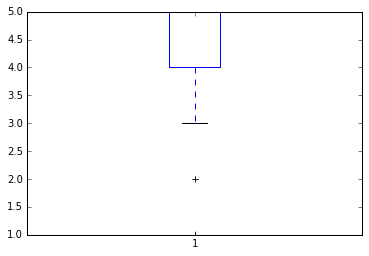

In [13]:
_ = plt.boxplot(df['Rating'])

In [14]:
df['Rating'].value_counts()

5    369
4    127
3     20
1      4
2      3
Name: Rating, dtype: int64

In [15]:
def detect_sentiment(text):
    text = re.sub(r'/\u\d+', '', text)
    text = ''.join([char for char in text if char not in string.punctuation])
    return TextBlob(text.encode('ascii', 'ignore') ).sentiment.polarity

In [16]:
df['TextBlobSentiment'] = [detect_sentiment(t) for t in df['Text']]

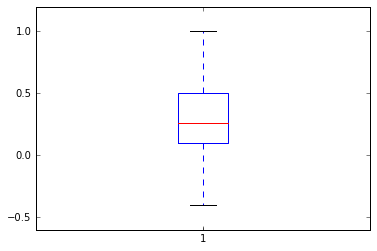

In [17]:
_ = plt.boxplot(df['TextBlobSentiment'])

In [18]:
import graphlab as gl

In [19]:
sf = gl.SFrame(df)

[INFO] graphlab.cython.cy_server: GraphLab Create v2.1 started. Logging: /tmp/graphlab_server_1471209662.log
INFO:graphlab.cython.cy_server:GraphLab Create v2.1 started. Logging: /tmp/graphlab_server_1471209662.log


This non-commercial license of GraphLab Create for academic use is assigned to jat257@cornell.edu and will expire on June 30, 2017.


In [20]:
m = gl.sentiment_analysis.create(sf, 'Rating', features=['Text'])

WARNING: The number of feature dimensions in this problem is very large in comparison with the number of examples. Unless an appropriate regularization value is set, this model may not provide accurate predictions for a validation/test set.

Logistic regression:

--------------------------------------------------------

Number of examples          : 476

Number of classes           : 2

Number of feature columns   : 1

Number of unpacked features : 5349

Number of coefficients    : 5350

Starting L-BFGS

--------------------------------------------------------

+-----------+----------+-----------+--------------+-------------------+---------------------+

| Iteration | Passes   | Step size | Elapsed Time | Training-accuracy | Validation-accuracy |

+-----------+----------+-----------+--------------+-------------------+---------------------+

| 1         | 3        | 0.002101  | 1.033769     | 0.989496          | 1.000000            |

| 2         | 5        | 1.000000  | 1.051206     | 0.995798          | 1.000000            |

| 3         | 6        | 1.000000  | 1.067695     | 0.997899          | 1.000000            |

| 4         | 7        | 1.000000  | 1.087968     | 1.000000          | 1.000000            |

| 5         | 8        | 1.000000  | 1.101449     | 1.000000          | 1.000000            |

| 6         | 9        | 1.000000  | 1.113023     | 1.000000          | 1.000000            |

+-----------+----------+-----------+--------------+-------------------+---------------------+

TERMINATED: Iteration limit reached.

This model may not be optimal. To improve it, consider increasing `max_iterations`.

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.



In [22]:
df['GraphLabPred'] = m.predict(sf)

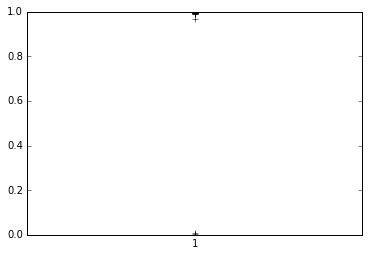

In [23]:
_=plt.boxplot(df['GraphLabPred'])